In [145]:
num_open_figures = len(plt.get_fignums())
num_open_figures

0

In [143]:
%matplotlib inline

import matplotlib.pyplot as plt

from ipywidgets import interact

def plot_graph(n):
    plt.plot(range(n))
    plt.show()


interact(plot_graph, n=(2,30))

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), Output()), _dom_classes=('widget-in…

<function __main__.plot_graph(n)>

In [16]:
inflation.index.strftime('%Y')[::12].to_numpy().tolist()

['1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [23]:
dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
dates[::12].strftime("%Y")

Index(['2020', '2021', '2022'], dtype='object')

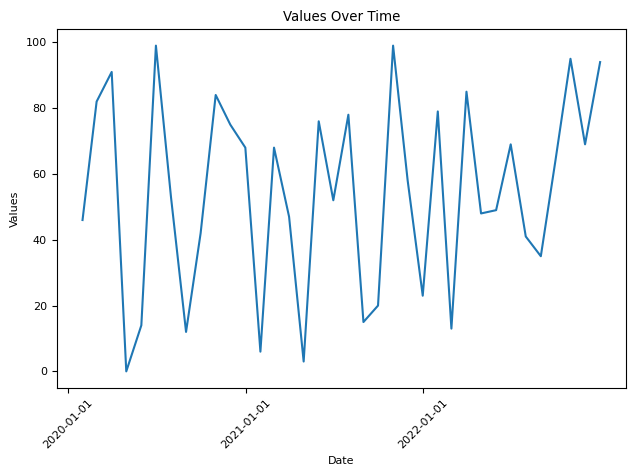

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate some sample data (timestamps and corresponding values)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
values = np.random.randint(0, 100, len(dates))

# Create a plot
plt.plot(dates, values)

# Customize the x-axis ticks and labels
plt.xticks(dates[::12].strftime("%Y"), rotation=45)  # Show ticks every 6 months and rotate the labels

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Values Over Time')

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
y_ticks = {}
y_ticks["key"] = range(1, 8)
y_ticks["value"] = [f"{y}%" for y in y_ticks["key"]]
y_ticks

{'key': range(1, 8), 'value': ['1%', '2%', '3%', '4%', '5%', '6%', '7%']}

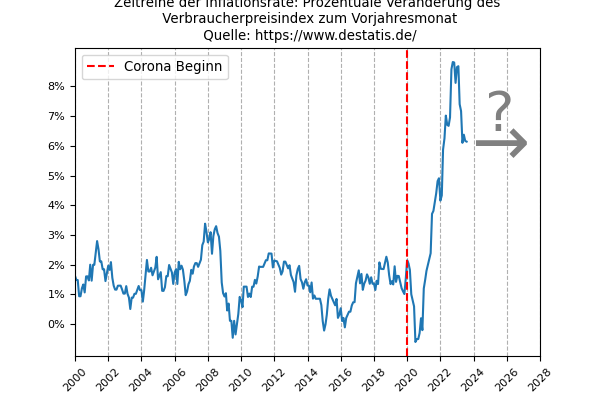

In [11]:
def plot_inf():
    import matplotlib as mpl
    figsize = (6, 4)

    mpl.rcParams['font.size'] = 8
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    from matplotlib.ticker import MultipleLocator
    import pandas as pd

    fig, ax = plt.subplots(figsize=figsize)
    if False:
        fig.subplots_adjust(
            left=0.05, 
            # right=0.9, 
            top=0.95, 
            # bottom=0.1
        )
    y = inflation.loc["2000":]
    y_max = "2028"
    ax.plot(y.index, y)
    ax.set_xlim(y.index.min(), pd.Timestamp(y_max))
    ax.set_title(
            "Zeitreihe der Inflationsrate: Prozentuale Veränderung des\n Verbraucherpreisindex"
            " zum Vorjahresmonat\n Quelle: https://www.destatis.de/"
        )

    ax.axvline(
        x=pd.Timestamp(corona_begin), color='red', linestyle='--', label='Corona Beginn'
    )
    ax.legend(fontsize="large")

    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax.xaxis.set_major_locator(MultipleLocator(1))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(True, axis='x', linestyle='--', which='major')
    # ax.xaxis.set_major_locator(plt.MultipleLocator(1))

    # ax.set_xticks(inflation.index.strftime('%Y')[::48].to_numpy().tolist(), rotation=45) 
    
    xticks = pd.date_range(y.index.min(), y_max, freq= "MS")

    cycle = 24
    ax.set_xticks(xticks[::cycle], xticks.strftime('%Y')[::cycle], rotation=45);
    # ax.set_yticks(y.index[::12], y.index.strftime('%Y')[::12], rotation=45);
    
    mpl.rcParams['font.size'] = 14; 
    
    y_ticks = {}
    y_ticks["key"] = range(0, 8 + 1)
    y_ticks["value"] = [f"{y}%" for y in y_ticks["key"]]


    ax.set_yticks(y_ticks["key"], y_ticks["value"])
    
    ax.text(pd.Timestamp("2024-09"), 6.5, "?", fontsize=40, color="gray") # , ha='center', va='center')
    ax.annotate("→", (pd.Timestamp("2025-09"), 6), fontsize=50, ha='center', va='center', color="gray")

plot_inf()

In [2]:
# For interactive plots
%matplotlib ipympl  

from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from plv.data import load_verbraucherpreisindex, corona_begin, max_inflation
from plv.plot import plot_ts, plot_seasonality, InteractiveForecastPlot , plot_inflation

inflation = load_verbraucherpreisindex(filter_columns=["inflation"])


import matplotlib as mpl
 
mpl.rcParams['font.size'] = 14; 
mpl.rcParams['lines.markersize'] = 10

import numpy as np
seed_value = 0; np.random.seed(seed_value);

**Anmerkungen zur Bedienung der interaktiven Präsentation**

- Die Vortragspräsentation ist als interaktive [Rise](https://rise.readthedocs.io/en/latest/) Präsentation konzeptiert.
- Um die interaktive Präsentation zu starten, öffnen Sie bitte folgende URL in ihrem Browser, 
<!-- oder scannen den QR Code -> kann ja das dann nicht bedienen? -->
- Es kann ein wenig dauern, bis die Präsentation gestartet wird. Notfalls laden Sie die Seite bitte neu.
- Die interaktive Präsentation kann wie folgt bedient werden:
    - `Leertaste`: Eine Folie weiter.
    - `Hochstelltaste + Leertaste`: Eine Folie zurück.
    - `Alt + r`: Aktivieren bzw. Deaktivieren der Präsentation.
    - Falls ein interaktive Plot bei Ausführung einer Code Zelle nicht richtig positioniert ist, deaktiviere und aktiviere Sie die Präsentation indem sie zwei Mal `Alt + r` drücken.

<div align="center" style="font-size:60px;">
Probelehrveranstaltung für die Professur für Angewandte Mathematik mit Schwerpunkt Statistical Learning
<br><br>
Stationarität von Zeitreihen mit Anwendung an einem praktischen Beispiel
<br><br>
Dr. Fabian Spanhel
<div/>
    
<div align="left" style="font-size:16px;">
<div/>



- Einführung und Motivation
- Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess
- Definition und Illustration der Stationarität 
- Praktische Anwendung anhand der Prognose von Inflationsdaten

- Lernziele sind, dass die Studierende den Zusammenhang zwischen Prozess und Daten verstehen 
- Die Definition der schwache Stationariät kennen
- Den AR(1) Prozess kennenlernen und wann er stationär ist
- Eine praktische Anwendung einens stationären AR(1) Prozess sehen

# Einführung und Motivation

Wieso ist der Mietpreis für manche Mieter in diesem Jahr enorm angestiegen?

- Wer von Ihnen hat einen Indexmietvertrag? 
    Mit einer Indexmiete vereinbaren Mieter und Vermieter bereits im Mietvertrag, dass sich die Kaltmiete erhöht, wenn die Verbraucherpreise steigen. Die Preise ermittelt regelmäßig das Statistische Bundesamt und veröffentlicht sie in dem sogenannten Verbraucherpreisindex (VPI).
- Dann teilen vermutlich ein paar unter Ihnen mein Leid, meine Miete wird sich im nächsten Monat nämlich um 12.2 % erhöhnen.
- Wie konnte es soweit kommen dass die Inflationsrate seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen ist? [Corona und die Wirtschaftskrise] haben dazu geführt, dass die Verbraucherpreise, also die Inflation steigen. Weltweit steigen die Produktionskosten, die Lieferketten sind seit der Corona-Pandemie gestört. Infolge des Krieges in der Ukraine kommt es zu Rohstoffengpässen, die das Angebot verknappen – vor allem bei Energie und Getreide.
    - Die Erzeugerpreise sind extrem stark angestiegen und nach und nach reichen die Produzenten diese Preisanstiege an die Verbraucher weiter. Bisher sind es vor allem die Energiepreise, die sich in den Verbraucherpreisen direkt niedergeschlagen haben. Aber da sollte man sich nicht täuschen lassen.
    - https://zdfheute-stories-scroll.zdf.de/inflation-preise-teuer/index.html
- Grafik Inflation
    - Was bedeutet monatliche Inflation: Die Veränderung des Verbraucherpreisindex zum Vorjahr wird als Inflationsrate bezeichnet

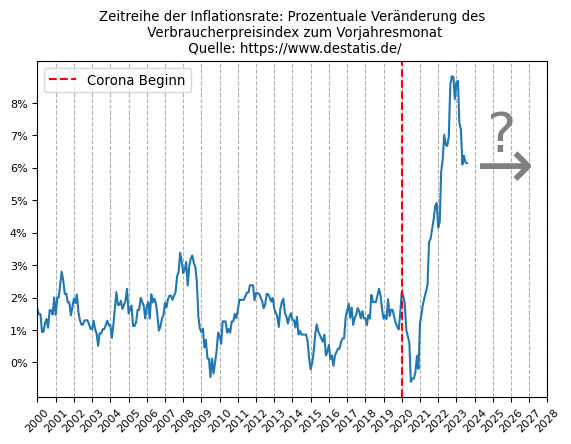

In [106]:
plot_inf()

- In einer Indexmiete steigt die Kaltmiete mit den Verbraucherpreisen.
- Die **Inflationsrate** ist die prozentuale Veränderung der Verbraucherpreise zum Vorjahresmonat.
- Aufgrund mehrere Krisen ist die Inflationsrate seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen.

- Wirtschaftsdaten (Börsenkurse, Zinsindizes, Absatzzahlen), Wetterdaten, Unternehmensdaten
Börsenkurse allgemein, Bevölkerungsentwicklung, Preisindex, Wahlabsichtsbefragungen, Wetterdaten, Zinsindex
- "Die Zeitreihenanalyse befasst sich in der Statistik mit der inferenzstatistischen Analyse von Zeitreihen und der Vorhersage von Trends (Trendextrapolation) zu ihrer künftigen Entwicklung"
- Abhängigkeit durch Zeit an Inflation erklären: Das was in 2008 war relativ egal, was in letzter Zeit passiert

**Was ist eine Zeitreihe?**

[TODO: Ersetze $T \subset \mathbb{T}$ durch $T \subset \mathbb{Z}$ und $\mathbb{T}$ durch $\mathbb{Z}$]

Im Folgenden, sei $T \subset \mathbb{T}$ eine abzählbare Teilmenge von $\mathbb{R}$.

Wenn wir von einer (diskreten) Zeitreihe sprechen, können damit zwei verschiedene Begriffe gemeint sein:
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 60px
                   ">
<!--
1. Eine Zeitreihe ist eine Abfolge von Daten $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.
<br><br>
2. Eine Zeitreihe ist ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.
-->
<ol style="margin: 20; padding: 0">
    <li>Eine Zeitreihe ist eine <strong>Abfolge von Daten</strong> $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.</li>
    <li>Eine Zeitreihe ist ein <strong>stochastischer Prozess</strong> $(Y_t)_{t\in \mathbb{T}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.</li>
</ol>
</blockquote>



**Die Verbindung zwischen 1. und 2. ergibt sich dadurch, dass Daten $(y_t)_{t=1,...,T}$ in 1. als eine Stichprobe eines zugrunde liegenden stochastischen Prozesses $(Y_t)_{t\in \mathbb{T}}$ in 2. aufgefasst werden.**

**Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess**

- Wichtig dass zu verstehen, in meiner Erfahrung war das unklar für manche Studierende oder sogar Doktoranden, dann ist auch alles leichter

interactive(children=(ToggleButtons(button_style='info', description=' ', options=('Daten', 'Zufallsvariablen'…

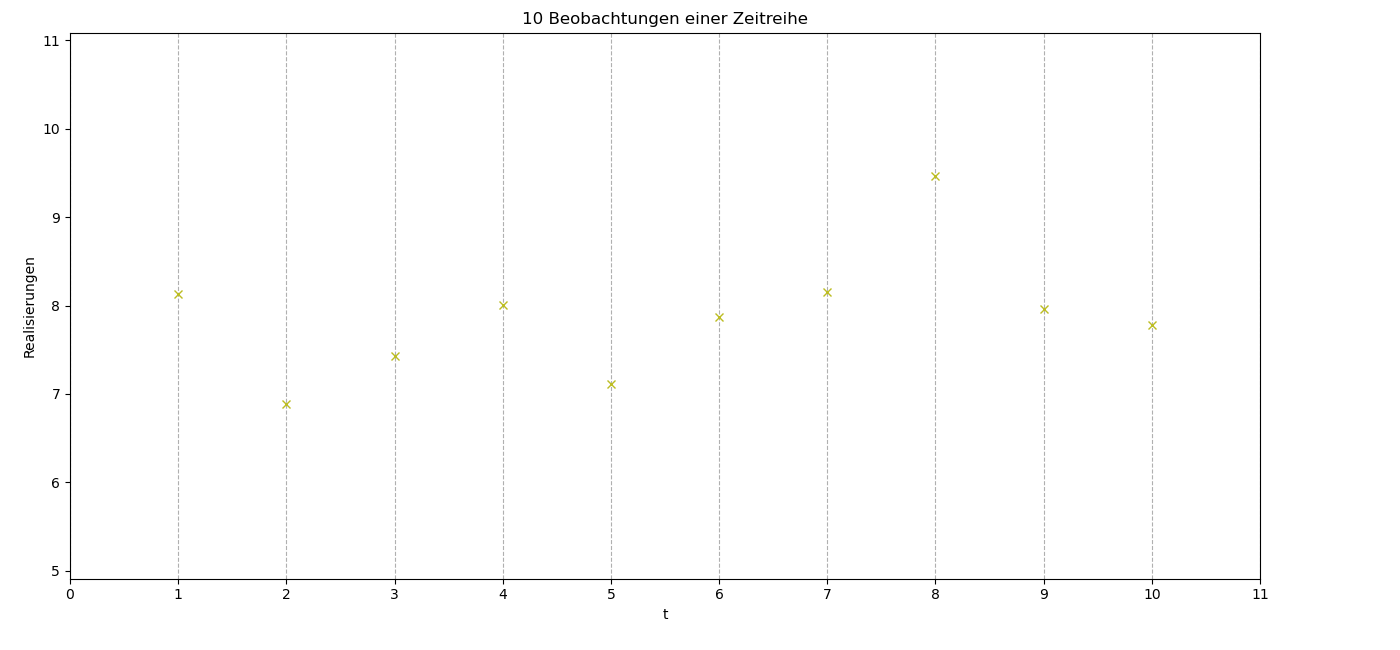

In [9]:
%matplotlib widget 
from plv.plot import DataVsProcess; 
DataVsProcess().plot(figsize=(14, 6.5));

## Annahmen an einen Zeitreihenprozess für die statistische Inferenz und Modellierung
[TODO] Diese Folie weg oder woanders
Für die statistische Inferenz mit Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des die Zeitreihe generierenden Prozesses vorliegt. Die Annahme der Ergodizität bedeutet, dass Stichprobenmomente, die aus einer endlichen Zeitreihe gewonnen werden, für 
�
→
∞T\rightarrow \infty  quasi gegen die Momente der Grundgesamtheit konvergieren.

- In der Praxis ist es häufig der Fall, dass Daten zu aufeinanderfolgenden Zeitpunkten mit gleichmäßigen Abstand erhoben werden.
- Diese Daten bezeichnen man als **Zeitreihe**.
- Anders als in Querschnittstudien, gibt es durch die Zeit eine natürlich Reihenfolge der Beobachtungen.
- Dies führt in der Regel dazu, dass Beobachtungen, die zeitlich nahe beieinander liegen, enger miteinander verbunden sind als Beobachtungen, die weiter auseinander liegen.
- **Die Zeitreihenanalyse** befasst sich primär mit der Vorhersage von Zeitreihen.

Die Punkte oben evtl. bei DataVsProcess einfügen (?)

# Stationarität

- Für die statistische Analyse und Modellierung von Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des datengenerierenden Prozesses vorliegt.
<!--
- Neben Ergodizität ist Stationarität eine bedeutende Eigenschaft eines stochastischen Prozesses.
-->
<!-- - Es gibt zwei Definition von Stationarität, die Klasse der stochastischen Prozess einschränken.
-->
- Wir konzentieren uns hier auf die sogenannte **schwache Stationarität**.

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 0px
                   ">
Definition: (<strong>Schwache Stationarität</strong>)<br>
Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$ ist schwach stationär $:\!\!\iff$
<br><br>
1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
<br><br>
für alle $\forall t \in \mathbb{T}$ und $\forall h \in \mathbb{T}$
</blockquote>

> **DEFINITION:** (Schwache Stationarität) <br>
> Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$ ist schwach stationär $:\!\!\iff$
>
> 1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
> 2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
>
> für alle $\forall t \in \mathbb{T}$ und $\forall h \in \mathbb{T}$.

<!--
## (Strikte Stationarität) und Kovarianzstationarität 
Frage hier an die Studierenden: Welche Definition ist stärker?
Evtl. hier auch wieder Grafik mit 4 Punkten und daran sichtbar machen (auf ZVs Ebene)
    Mittelwert der Trajektorien sollte gleich sein
-->

**Erste Beispiele für (schwach) stationäre Prozesse**

1. Sei $(Y_t)_{t\in \mathbb{T}}$ eine Folge von i.i.d. Zufallsvariablen.
2. Sei $(Y_t)_{t\in \mathbb{T}}$ Weißes Rauschen, d.h., $E[Y_t] = 0$ für alle $t \in \mathbb{Z}$ und $Cov[Y_t, Y_h]=\sigma_U^2$ für $t=h$ und sonst $Cov[U_t, U_h]=0$ alle $t, h \in \mathbb{Z}$.
3. Sei $(Y_t)_{t\in \mathbb{T}}$ definiert durch $Y_t = bU_{t-1} + U_t$, wobei $(U_t)_{t\in \mathbb{T}}$ Weißes Rauschen ist.


- Die Annahme der Ergodizität bedeutet, z.B. dass das arithmetische Mittel einer Trajektorie über die Zeit gegen den selben Wert konvergiert wie das arithemtische Mittel von mehreren Realisierung eines Zeitpunktes, also  gegen den Erwartungswert der Zufallsvariable zu einem Zeitpunkt konvergiert.
- Bei beiden Typen von Prozessen besitzen die endlichdimensionalen Verteilungen des Prozesses bestimmte zeitunabhängige Eigenschaften. Diese beziehen sich bei der Stationarität im engeren Sinn auf die gesamte Verteilungsgestalt und bei der Stationarität im weiteren Sinn nur auf die ersten beiden Momente der endlichdimensionalen Verteilungen.
- Frage an die Studierende: Beispiele für Prozesse die schwach stationär oder nicht-stationär sind?
    - Eher nicht stationäre Beispiele: Temperatur (da Jahreszeiten, also saisonale Schwankungen), Körpergröße eines Menschens über die Jahre. Gemütszustand. Evaluation der PLV.

Evtl. Beispiel für Zeitreihenprozesse, sind die stationär? Darüber abstimmen, mit ja/nein/weiß nicht/kommt drauf an (Es reicht wenn sie die Erwartungs- und Varianzstationarität überprüfen)
1. iid Exponential
1. Summe zweier schwach stationärer Prozesse die voneinander unabhängig sind
1. Weißes Rauschen.
2. MA(1)
3. AR(1)

Laut Andi auch Plots zeigen von nicht stationären Prozessen

Weißes Rauschen einführen

**Der einfachste (schwach) stationäre Prozess**
<br><br>

<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc
                   ">
Definition: (<strong>Weißes Rauschen</strong>)<br>
$(U_t)_{t\in \mathbb{T}}$ ist Weißes Rauschen $:\!\!\iff$ Für alle $t, h \in \mathbb{Z}$, mit $t\neq h$ gilt:
<br>

1. $E[U_t] = 0$
2. $Var[U_t] = \sigma^2_U \in \mathbb{R}$
3. $Cov[U_t, U_h] = 0$
</blockquote>

**Die Klasse der (linearen) AR(1) Prozesse**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 20px; 
                   border: 3px solid #ccc;
                   margin-bottom: 0px;
                   margin-top: 50px
                   ">
Definition: (<strong>Autoregressiver Prozess der Ordnung 1</strong>)<br>
$(Y_t)_{t\in \mathbb{T}}$ ist ein autoregressiver Prozess der Ordnung 1  $:\!\!\iff$<br> Für alle ${t\in \mathbb{T}}$ gilt

$$
\begin{align}
Y_t &= c + aY_{t-1} + U_{t}
\end{align}
$$

wobei $(U_t)_{t\in \mathbb{T}}$ Weißes Rauschen ist.
</blockquote>

- Wir bezeichnen diese Prozesse auch kurz als AR(1) Prozesse.
- Die Zufallsvariable $Y_t$ ist also linear abhängig von der Zufallsvariable $Y_{t-1}$ davor und einem Zufallsfehler $U_t$.
- Frage: Ist $(Y_t)_{t\in \mathbb{T}}$ (schwach) stationär?

## Illustration anhand der Simulation eines (linearen) AR(1) Prozesses

1. Modellgleichung
    1. Autoregressive weil auf sich selbst regressiert, der Ordnung 1 weil ein Lag
    1. Was bedeutet das? Was ist a?
    1. Was ist wenn a negativ ist? Interessant weil ich sehr gut schätzen kann (Bild mit Normalverteilung)
1. Simulationsbilder in Abhängigkeit von a
    1. Simulation nicht stationär weil wir immer mit gleichen Wert starten, aber schauen wir mal was passiert
<!--
1.	Theoretischen Beweis skizzieren (schon sophisticated, bei Copulas einfacher)
    1. Nur mean stationarität zeigen
    1.	Beweis für Kovarianzstationarität analog (Kovarianz auch nur Erwartungswert), oder E[Y_tY_{t-h}^k], k = 0, 1
    1.	Beweis für strikt stationär schwierig, aber auch |a| <=1
        1.	Stärkere Annahmen and die Abhängigkeit der Störterme
        2.	Keine geschlossene Form für die Multivariate Verteilung im allgemeinen (nur durch Simulationen möglich)
-->

**Simulation von Realisierungen eines AR(1) Prozesses**
- Um diese Frage zu untersuchen, ist es hilfreich Realisierungen des Prozesses zu generieren.
- Wie können wir $T$ Realisierungen eines AR(1) Prozess $Y_t = c + a Y_{t-1} + U_t$ generieren?

```python
import numpy as np

T = 10
(c, a) = (0, 0.5)

u = np.random.normal(size=T)
y = np.zeros(T)
for t in range(1, T):
    y[t] = c + a * y[t-1] + u[t] 
    
print(y)
```

In [11]:
import numpy as np

T = 10
(c, a) = (0, 0.5)
u = np.random.normal(size=T)
y = np.zeros(T) 
for t in range(T):
    y[t] = c + a * y[t-1] + u[t]
    
print(y)

[-2.45382638 -0.16022493  0.84678377  0.39441237  0.97596707  0.67224454
 -2.62276142 -1.46906449 -1.22604121  0.0245071 ]


In [1]:
# For interactive plots
%matplotlib ipympl 

interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

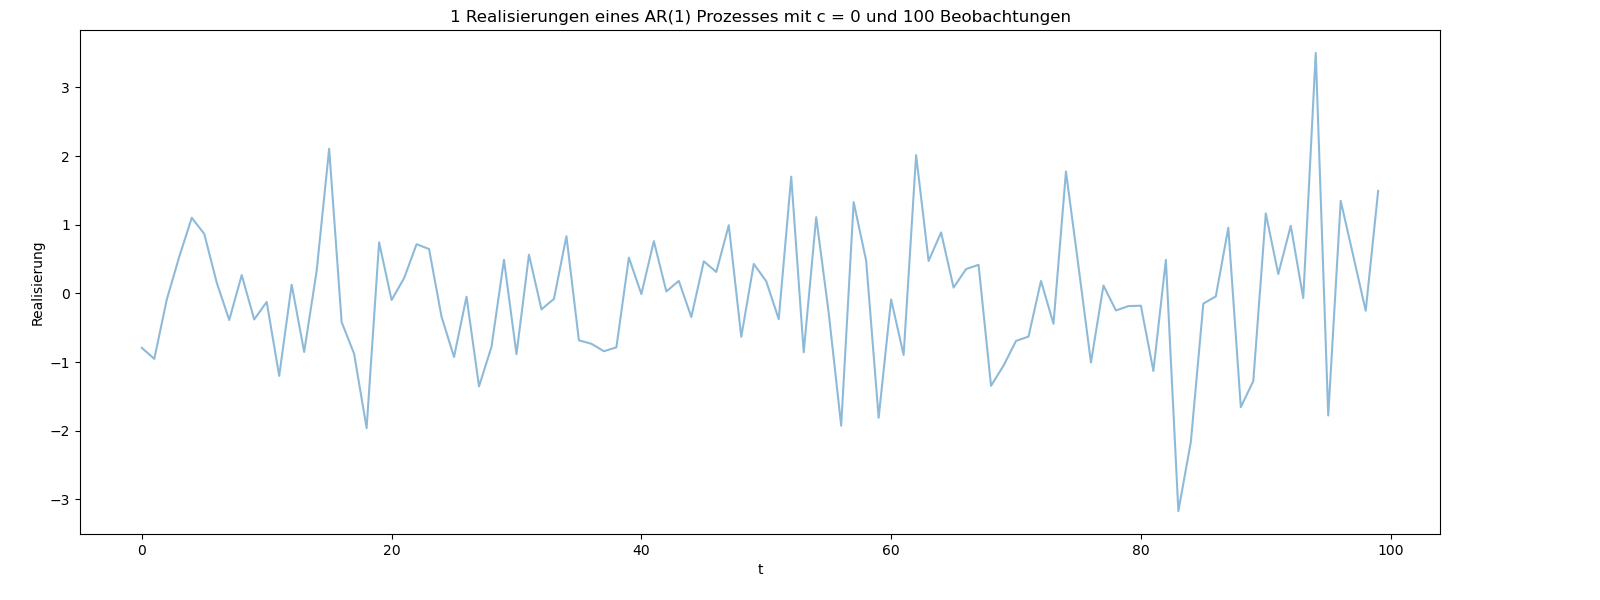

In [13]:
from plv.plot import SimARSimple
SimARSimple().plot(figsize=(16, 6))

- Mit n = 100 und r = 1 anfangen
- zeige a = 0, a = -1, a = 1
- Dann fragen, wie könnte ich Stationarität analysieren?

interactive(children=(FloatSlider(value=0.0, description='a', max=1.1, min=-1.1), IntSlider(value=100, descrip…

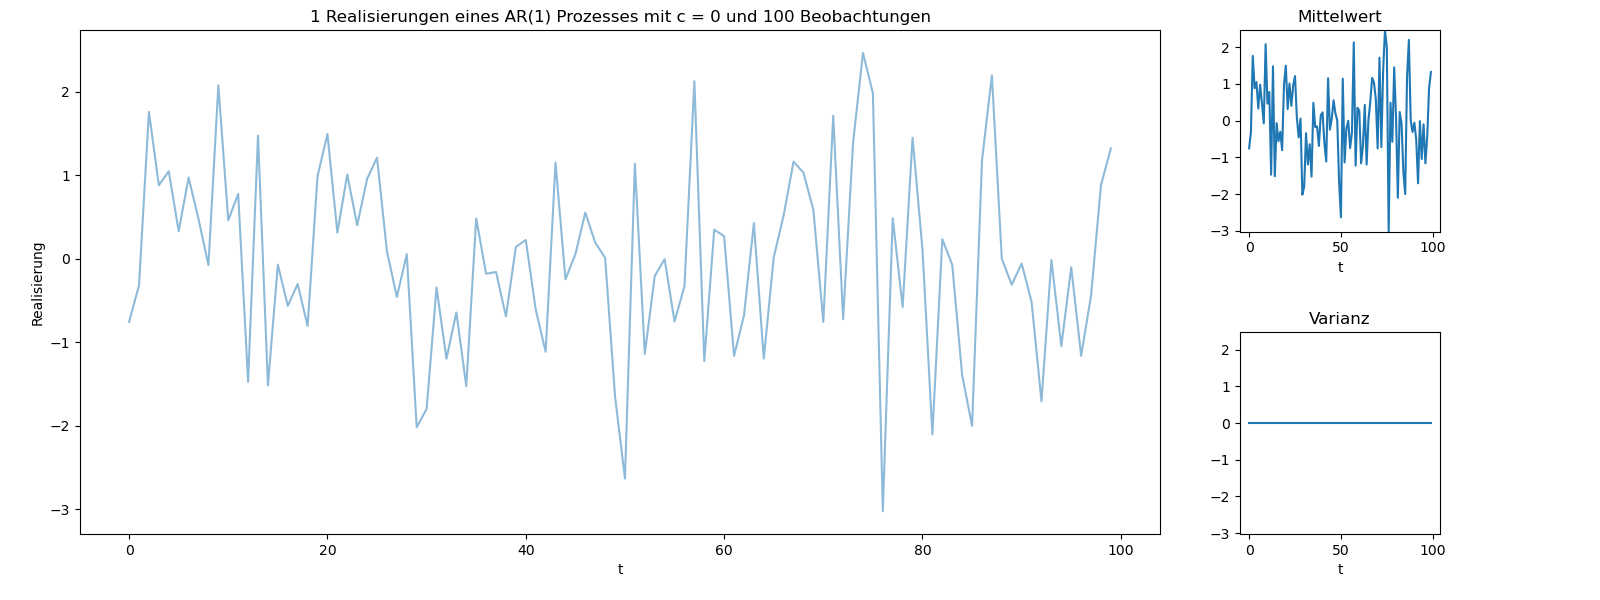

In [14]:
from plv.plot import SimARSimple
SimARSimple().plot(figsize=(16, 6), plot_mean_var=True) # evtl burnin setzen? 

- r auf 1001 setzen, T so lassen
- a erhöhen bis zu a=0.99, sieht so aus als würde die Varianz ansteigen -> jetzt T auf 1001 setzen
- a = 1
- a = 1.1

## Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses

**Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses**
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 5px; 
                   border: 3px solid #ccc;
                   margin-bottom: -0px;
                   margin-top: 40px
                   ">
Theorem: (<strong>Hinreichende Bedingungen für die Stationarität eines AR(1) Prozesses</strong>)<br>
Sei $Y_t = aY_{t-1} + U_t$, wobei $(U_t)_{t \in \mathbb{Z}}$ Weißes Rauschen ist und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$. <br><br>
Falls $|a| < 1$,  dann ist $(Y_t)_{t \in \mathbb{Z}}$ schwach stationär.
</blockquote>

- Der Beweis dieses Theorems ist nicht trivial.
- Im Folgenden werden die zwei Schritte deshalb nur skizziert.
    1. Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$.
    2. Berechung des Erwartungswerts und Kovarianzfunktion von $(Y_t)_{t \in \mathbb{Z}}$.

In der Literatur so nicht so einfach zu finden und nicht exakt

Hier keine Konstante $c$ betrachtet.

**Schritt 1: Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$.**

Rekursive Substituierung führt zu

$$
\begin{align}
Y_t & = aY_{t-1} + U_t = a(aY_{t-2} + U_{t-1}) + U_t = \ldots = 
\\ & = \underbrace{a^h Y_{t-h}}_{=:A_h} + \underbrace{\sum_{i=0}^{h-1}a^{i}U_{t-i}}_{=:B_h} =: X_h
\end{align}
$$

Was passiert mit $X_h$, wenn $h\to\infty$?

&#9888;&#65039; Da $X_h:=A_h + B_h$ eine Zufallsvariable ist, müssen wir zunächst eine Konvergenzart wählen.
<blockquote style="width: auto; background-color: 
                   lightyellow; color: black; 
                   margin: 70px; 
                   padding: 5px; 
                   border: 3px solid #ccc;
                   margin-bottom: -8px
                   ">
Definition: (<strong>Konvergenz im quadratischen Mittel</strong>)<br>
Eine Folge von Zufallsvariable $(X_t)_{t\in\mathbb{Z}}$ konvergiert im quadratischen Mittel gegen eine Zufallsvariable $X$ $:\!\!\iff$
$\lim_{t\to\infty} E[(X_t-X)^2] = 0$. In diesem Fall schreiben wir $X_t \stackrel{2}{\to} X$.
</blockquote>

<div style="margin-bottom: -2040px, margin-top: 0px">

- Falls $A_t \stackrel{2}{\to} A$ und $B_t \stackrel{2}{\to} B$ dann gilt $A_t + B_t \stackrel{2}{\to} A + B$.
- Wir können also die Konvergenz von $A_h$ und $B_h$ separat betrachten.

</div>

<div style="margin-bottom: -440px, margin-top: -100px">

- Dass $A_h \stackrel{2}{\to} 0$, wenn $|a|<1$ und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$, lässt sich leicht zeigen.
- Dass eine Zufallsvariable $B \in L^2$ existiert, gegen die $B_h$ im quadratischen Mittel konvergiert, folgt daraus, dass der $L^2$ Raum vollständig ist und man zeigen kann, dass $B_h$ eine Cauchy Folge ist falls $|a| < 1$ und $(U_t)_{t\in\mathbb{Z}}$ weißes Rauschen ist.
- Insgesamt folgt also $\exists X \in L^2\colon X_h \stackrel{2}{\to} X$.
</div>
    
    

- One way to define the distance between X_t and X is the expectation of the squared difference.
- Das ist für uns hilfreich da wir ja später an dem Erwartungswert und der Varianz des Limes interessiert sind.
- [Dreiecksungleichung](https://math.stackexchange.com/questions/4281919/convergence-of-a-linear-combination-of-random-variables), diese kann ich nutzen weil E[(X_t-X)^2] = L2_Norm^2 und die Dreiecksungleichung für die L2_Norm gilt.
- Frage: Wer weiß noch alles was eine Cauchy Folge ist?
- Wieso ist $B_h$ eine Cauchy Folge
$B_h \text{ is Cauchy } \rightarrow E[(B_m-B_n)^2] < \epsilon$
$E[(\sum_{i=N+1}^Ma_iU_{t-i})^2] \stackrel{U is WN}{=} \sum_{i=N+1}^M a^{2i}E[U_{t-i}^2] = E[U_{t-i}^2]\underbrace{\sum_{i=N+1}^M a^{2i}}_{Cauchy}$

**Schritt 2: Berechung des Erwartungswerts und Kovarianzfunktion von $(Y_t)_{t \in \mathbb{Z}}$.**

Setzen wir $\displaystyle{X:= \sum_{i=0}^{\infty}a^{i}U_{t_i}}$ dann gilt $\displaystyle{Y_t \stackrel{2}{\to} \sum_{i=0}^{\infty}a^{i}U_{t_i}}$ und es folgt
<!--
Falls $|a|<1$, folgt dass $\sum_{i=0}^{\infty}|a^{i}|\in \mathbb{R}$, und wenn  $(U_t)_{t\in\mathbb{Z}}$ Weißes Rauschen ist folgt aus [Fubini-Tonelli Theorems](https://en.wikipedia.org/wiki/Fubini's_theorem#Fubini-Tonelli) 

Durch die Anwendung des [Fubini-Tonelli Theorems](https://en.wikipedia.org/wiki/Fubini's_theorem#Fubini-Tonelli) und der Tatsache, dass $\sum_{i=0}^{\infty}|a^{i}|\in \mathbb{R}$, falls $|a|<1$, und $(U_t)_{t\in\mathbb{Z}}$ Weißes Rauschen ist, folgt
-->

$$
\begin{align*}
E[Y_t] & = E[\sum_{i=0}^{\infty}a^{i}U_{t-i}] \stackrel{|a|<1,\ (U_t)_{t\in\mathbb{Z}} \text{Weißes Rauschen}}{=} \sum_{i=0}^{\infty}a^{i}\underbrace{E[U_{t-i}]}_{=\ 0} = 0
\end{align*}
$$


$$
\gamma(t, h) = Cov[Y_t, Y_{t-h}] 
%= E[\sum_{i=0}^{\infty}a^{i}U_{t-i} \sum_{j=0}^{\infty}a^{j}U_{t-h-j}] 
\stackrel{|a|<1,\ (U_t)_{t\in\mathbb{Z}} \text{Weißes Rauschen}}{=}
%\ldots
%\sum_{i=0}^{\infty}\sum_{j=0}^{\infty}a^{i}a^{j}\underbrace{E[U_{t-i}U_{t-h-j}}_{\sigma_U^2 \text{ if } i = h + j, \text{ else } 0}]
%\\
%\stackrel{i:=h+j}{=} \sum_{j=0}^{\infty}a^{h+j}a^{j}\sigma_U^2 = a^h\sum_{j=0}^{\infty}a^{2j}\sigma_U^2
a^h\frac{\sigma_U^2}{1-a^2} \in \mathbb{R}
$$

Somit ist $E[Y_t]=0$ und $\gamma(t, h) \in \mathbb{R}$ hängt nicht von $t$ ab. Folglich ist $(Y_t)_{t \in \mathbb{Z}}$ stationär. &#11035;

- Noch offener Punkt, wenn X_h to X, wieso ist dann E[Y_t] = E[X]? Also warum passt das alles?
- [Fubini-Tonelli Theorems](https://en.wikipedia.org/wiki/Fubini's_theorem#Fubini-Tonelli)
https://math.stackexchange.com/questions/1166994/linearity-of-expectation-for-infinite-sums
- Fubini-Tonelli oder Dominated Convergence Theorem erlaubt vertauschen

# Praktische Anwendung: Modellierung und Prognose der Inflationsrate

- Im Folgenden schätzen wir AR(1) Prozesse mittels des Kleinsten Quadrate Schätzers für mehrere "in-sample" Zeiträume.
- Ein "in-sample" Zeitraum der Länge $T$ beinhaltet die Daten, die für die Schätzung benutzt werden,
    und geht von Stichprobenanfang bis zu einem gewissen Monat. 
- Die "out-of-sample" Daten sind dann die Daten nach diesem Monat.
- Für diese "out-of-sample" Daten machen wir ab dem Zeitpunkt $T$ eine Mehrschrittprognose $\text{Pred}_T[Y_{T+h}], h\geq 1$, die rekursiv gegeben ist durch

$$\text{Pred}_T[Y_{T+h}] = a\text{Pred}_T[Y_{T+h-1}]$$

Wir betrachen ohne Corona
- Am 31. Dezember 2019 wurde der Ausbruch einer neuen Lungenentzündung mit noch unbekannter Ursache in Wuhan in China bestätigt.[5] Am 30. Januar 2020 rief die Weltgesundheitsorganisation (WHO) angesichts der Ausbreitung und schnellen Zunahme der Infektionen mit dem Coronavirus 2019-nCoV eine internationale Gesundheitsnotlage au
- Es gibt mehrere Möglichkeiten wie man schätzt, wie benutzen KQ
Custom deterministic terms (deterministic)

Accepts a DeterministicProcess

Exogenous variables (exog)

A DataFrame or array of exogenous variables to include in the model


## Ohne Dummy

- Keine Kreuzvalidierung nötig, da least-squares benutzt wird, man könnten den autoregressiven Parameter natürlich penalisieren und dann tunen
- Fitten bis 2018, dann Prognose
- fitten bis 2020 (vor Corona und Wirtschaftskrise), dann Prognose
- Diskussion: Ist da ein Strukturbruch passiert? Stationarität verletzt? Es ist möglich, wenn auch eher unwahrscheinlich, dass die Zeitreihen so ansteigt (mit Simulation rausfinden wie wahrscheinlich das ist, dass so ein Trend mindestens beobachtet wird)
- Rein datenbasiert das schwer zu beantworten. Eher Expertenwissen oder komplexere Modell wo externe Faktoren eine Rolle spielen (Konsumausgaben, Wirtschaftliche Entwicklung, was treibt die Inflation)

In [1]:
%matplotlib ipympl 

from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

# from plv.data import load_verbraucherpreisindex, max_inflation, corona_begin
# from plv.plot import plot_ts, plot_seasonality, plot_is_oos_forecast, InteractiveForecastPlot, InteractiveForecastPlotNew

# inflation = load_verbraucherpreisindex(filter_columns=["inflation"])

interactive(children=(IntSlider(value=2008, description='Jahr', max=2024, min=2008), IntSlider(value=1, descri…

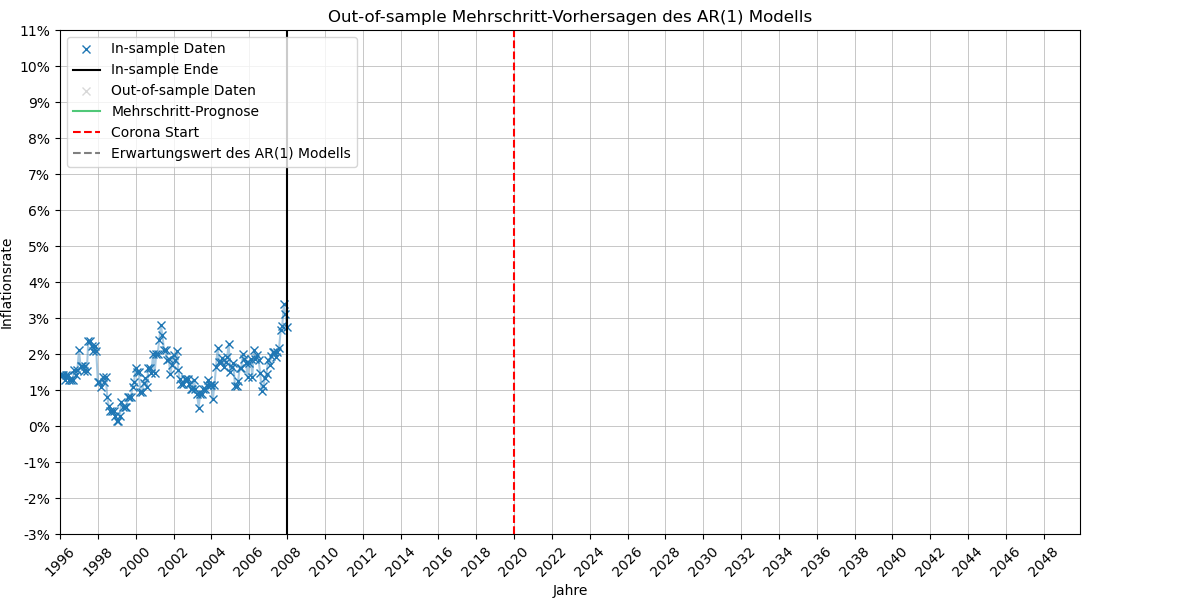

In [15]:
from plv.plot import forecast_inflation;
forecast_inflation()

**Beobachtungen:**
- Die vorherige Analyse lässt vermuten, dass die Annahme der schwachen Stationarität ab der Corona Krise nicht plausibel ist.
- Auch wenn der geschätzte autoregressive Parameter des Prozesses bis zum aktuellsten Monat wieder kleiner als 1 ist, so ist die Entwicklung der implizierten Inflationsrate eventuell zu hoch.
- **Frage:**
Wie können wir damit umgehen, dass die Ereignisse zwischen Corona Beginn und Februar 2023 (= Zeitpunkt der höchsten Inflation) eine
Ausnahme darstellt und diese die langfristige Prognose der Inflation nicht beeinflussen sollten?

**Idee:**

Definiere die Krisen Dummy $D_t$, so dass $D_t = 1$ wenn $t$ in Corona Beginn und Februar 2023 und 0 sonst und schätze
$$Y_t = c + aY_{t-1} + \delta D_t + U_t$$. 

2019 und 2020 lag die monatliche Inflationsrate in Deutschland zunächst meist zwischen 1 und 2 Prozent, in der zweiten Jahreshälfte 2020 sank sie vorübergehend leicht in den negativen Bereich. In dieser Zeit war die deutsche Mehrwertsteuer aufgrund der Corona-Krise sechs Monate lang abgesenkt worden.

## Mit Dummy

interactive(children=(IntSlider(value=2019, description='Jahr', max=2024, min=2008), IntSlider(value=12, descr…

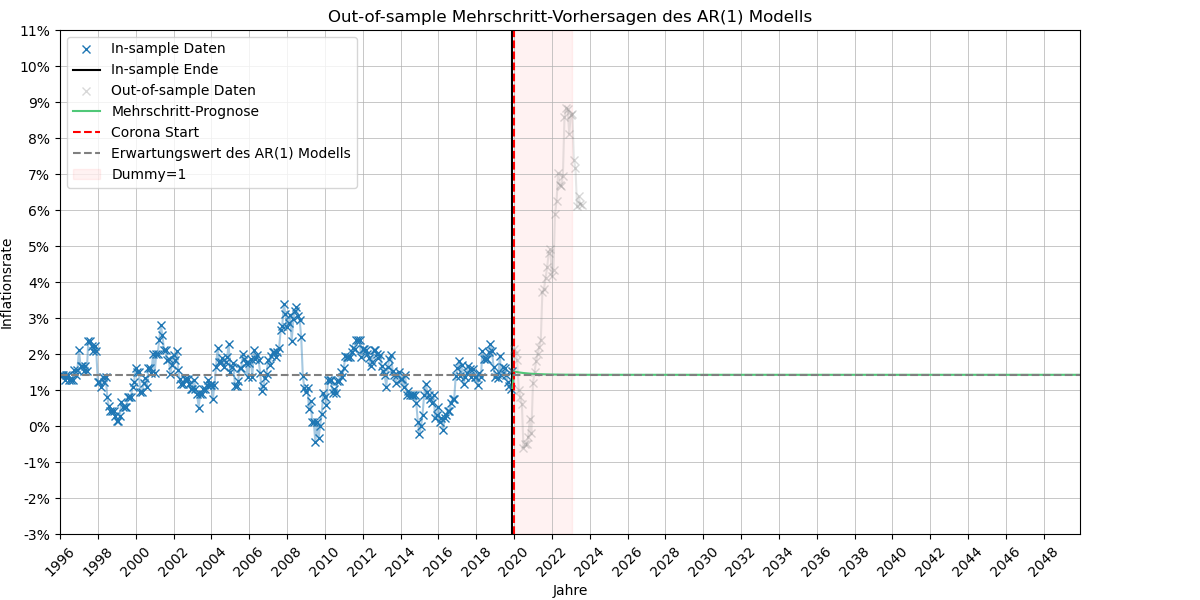

In [16]:
forecast_inflation(dummy=True)

In [ ]:
# Je näher an nicht-stationär desto volatiler wird die Schätzung für den Mittelwert aus dem AR(1) Modell
# Siehe inflation.loc["2020-01-01":"2021-06"] -> inflation.loc["2020-01-01":"2021-07"]

# Zusammenfassung


# Literatur

Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. https://doi.org/10.2307/j.ctv14jx6sm.

Lütkepohl, Helmut. New Introduction to Multiple Time Series Analysis. Springer, 2005. https://doi.org/10.1007/978-3-540-27752-1